In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Poisson, NegativeBinomial
import joblib


In [2]:
min_year_for_analyis = 2011
absolute_min_year = 2011
covid_months = range((2020 - min_year_for_analyis)* 12, (2020 - min_year_for_analyis)* 12 + 20) # Bingling's paper: disruption between April 2020 and Dec 2021

In [4]:
ANC_monthly_reporting_by_facility = pd.read_csv("/Users/rem76/Desktop/Climate_change_health/Data/monthly_reporting_ANC_by_smaller_facility_lm.csv", index_col=0)
monthly_reporting_by_facility = pd.read_csv("/Users/rem76/Desktop/Climate_change_health/Data/monthly_reporting_by_smaller_facility_lm.csv", index_col=0)
Inpatient_monthly_reporting_by_facility = pd.read_csv("/Users/rem76/Desktop/Climate_change_health/Data/monthly_reporting_Inpatient_by_smaller_facility_lm.csv", index_col=0)


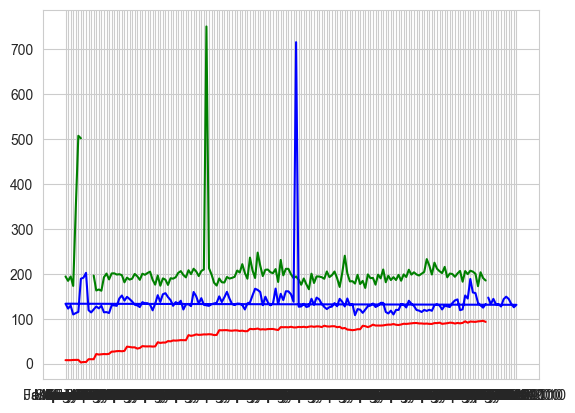

In [7]:
plt.plot(ANC_monthly_reporting_by_facility.index, ANC_monthly_reporting_by_facility.mean(axis = 1), color = "green", label = "ANC")
plt.plot(monthly_reporting_by_facility.index, monthly_reporting_by_facility.mean(axis=1), color="red",
         label="Reporting")
plt.plot(Inpatient_monthly_reporting_by_facility.index, Inpatient_monthly_reporting_by_facility.mean(axis=1), color="blue", label="Inpatient")

Remove COIVD months

In [8]:
monthly_reporting_by_facility.iloc[covid_months, :] = np.nan
Inpatient_monthly_reporting_by_facility.iloc[covid_months, :] = np.nan
ANC_monthly_reporting_by_facility.iloc[covid_months, :] = np.nan


In [ ]:
for facility in monthly_reporting_by_facility.columns:
    if facility in Inpatient_monthly_reporting_by_facility.columns: 
        for month in monthly_reporting_by_facility.loc[facility]:
            if monthly_reporting_by_facility.loc[month,facility] >= 0:
                if Inpatient_monthly_reporting_by_facility.loc[month,facility]